In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def load_jpeg_image_as_gray(file_path):
    """Load a JPEG image and convert it to a NumPy array."""
    image = Image.open(file_path)
    image = image.convert('L')
    return np.array(image)

def load_jpeg_image(file_path):
    """Load a JPEG image and convert it to a NumPy array."""
    image = Image.open(file_path)
    return np.array(image)

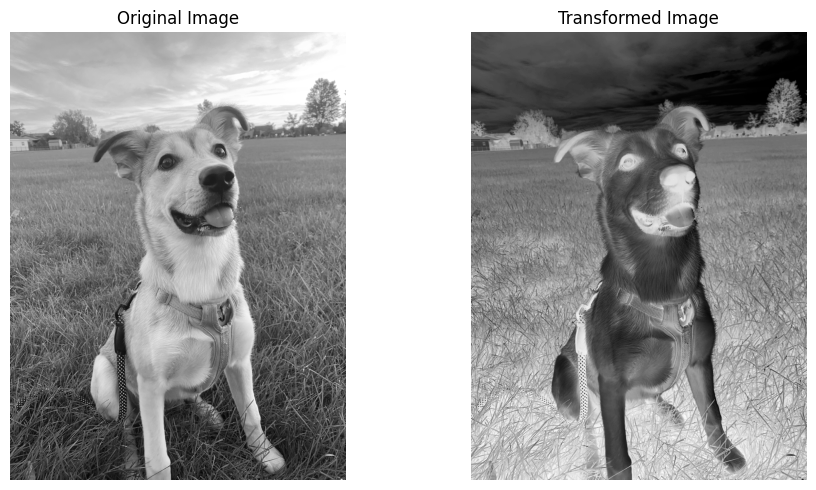

In [41]:

# Load image using OpenCV in grayscale mode
input_file = "raw_image_files/IMG_4116.JPEG"
image = cv2.imread(input_file, cv2.IMREAD_GRAYSCALE)

# Apply point transformation: Negative transformation (invert pixel values)
transformed_image = 255 - image

cv2.imwrite("negative_tilly.jpg", cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))

# Display the original and transformed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save the transformed image
# transformed_image.save("transformed_image.jpg")

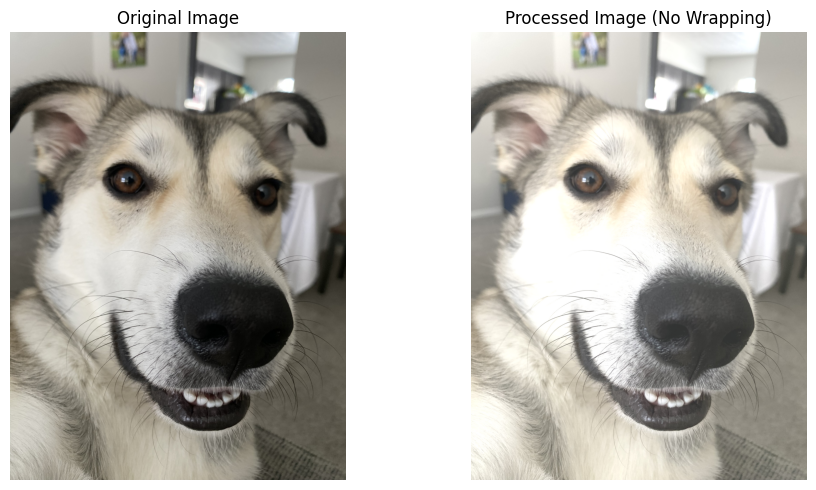

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color (BGR format)
input_file = "raw_image_files/IMG_4990.JPEG"
image = cv2.imread(input_file, cv2.IMREAD_COLOR)

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to float32 to prevent overflow/underflow
image_float = image.astype(np.float32)

# Brightness adjustment (increase by 50)
brightness_factor = 50
image_bright = np.clip(image_float + brightness_factor, 0, 255)

# Convert back to uint8
image_processed = image_bright.astype(np.uint8)

# Convert back to RGB for display
image_processed_rgb = cv2.cvtColor(image_processed, cv2.COLOR_BGR2RGB)
cv2.imwrite("brightened_tilly.jpg", cv2.cvtColor(image_processed_rgb, cv2.COLOR_RGB2BGR))

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_processed_rgb)
plt.title('Processed Image (No Wrapping)')
plt.axis('off')

plt.tight_layout()
plt.show()


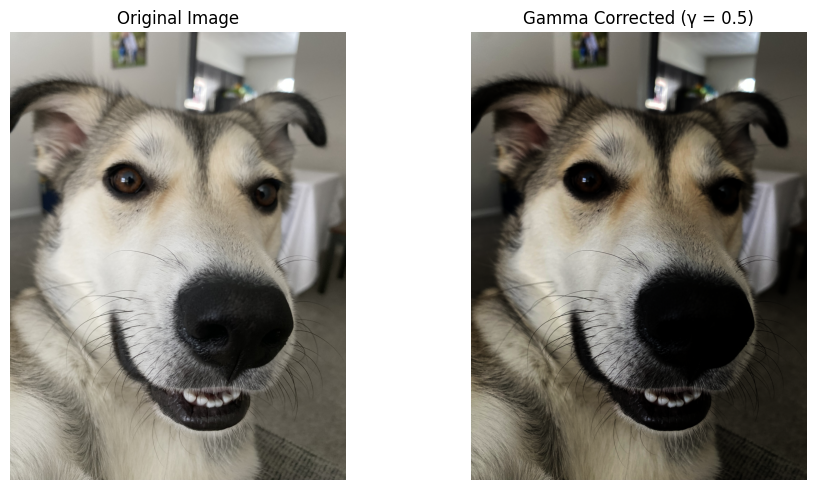

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma=1.0):
    """Apply gamma correction to an image."""
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)  # Apply lookup table for fast transformation

# Load the image in color (BGR format)
input_file = "raw_image_files/IMG_4990.JPEG"
image = cv2.imread(input_file, cv2.IMREAD_COLOR)

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gamma Correction (Gamma > 1 darkens, Gamma < 1 brightens)
gamma_value = 0.5 # Adjust this value (e.g., 0.5 for brightening, >1 for darkening)
image_gamma_corrected = gamma_correction(image, gamma_value)

# Convert back to RGB for display
image_gamma_corrected_rgb = cv2.cvtColor(image_gamma_corrected, cv2.COLOR_BGR2RGB)

# Save the processed image
cv2.imwrite("dark_tilly_gamma.jpg", cv2.cvtColor(image_gamma_corrected_rgb, cv2.COLOR_RGB2BGR))

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_gamma_corrected_rgb)
plt.title(f'Gamma Corrected (γ = {gamma_value})')
plt.axis('off')

plt.tight_layout()
plt.show()


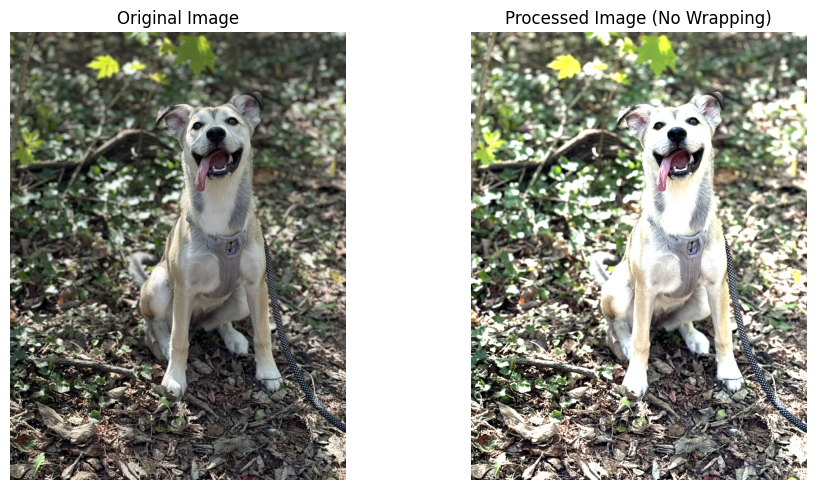

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color (BGR format)
input_file = "raw_image_files/IMG_9777.JPEG"
image = cv2.imread(input_file, cv2.IMREAD_COLOR)

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to float32 to prevent overflow/underflow
image_float = image.astype(np.float32)

# Brightness adjustment (increase by 50)
contrast_factor = 1.1
image_contrast = np.clip(image_float ** contrast_factor, 0, 255)

# Convert back to uint8
image_processed = image_contrast.astype(np.uint8)

# Convert back to RGB for display
image_processed_rgb = cv2.cvtColor(image_processed, cv2.COLOR_BGR2RGB)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_processed_rgb)
plt.title('Processed Image (No Wrapping)')
plt.axis('off')

plt.tight_layout()
plt.show()

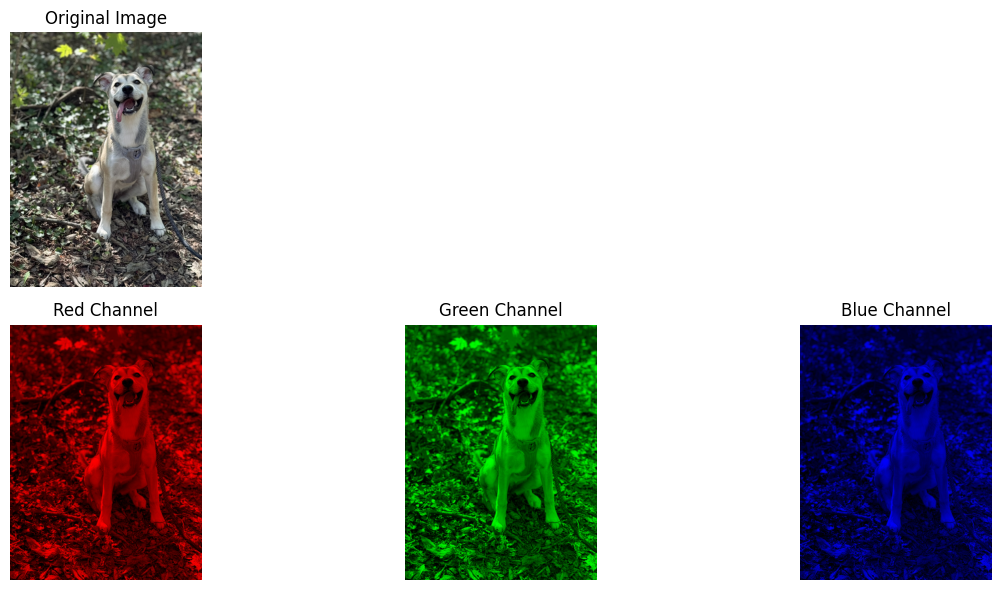

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # Import PIL for saving images

# Load the image in color (BGR format)
input_file = "raw_image_files/IMG_9777.JPEG"
image = cv2.imread(input_file, cv2.IMREAD_COLOR)

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract the Red, Green, and Blue channels
R, G, B = cv2.split(image_rgb)

# Create blank images for visualization
zeros = np.zeros_like(R)

# Create RGB images with only one channel active
red_image = np.stack([R, zeros, zeros], axis=2)   # Red channel
green_image = np.stack([zeros, G, zeros], axis=2) # Green channel
blue_image = np.stack([zeros, zeros, B], axis=2)  # Blue channel

# ✅ Save images using OpenCV (BGR format)
cv2.imwrite("red_tilly.jpg", cv2.cvtColor(red_image, cv2.COLOR_RGB2BGR))
cv2.imwrite("green_tilly.jpg", cv2.cvtColor(green_image, cv2.COLOR_RGB2BGR))
cv2.imwrite("blue_tilly.jpg", cv2.cvtColor(blue_image, cv2.COLOR_RGB2BGR))

# ✅ Save images using PIL (Alternative)
Image.fromarray(red_image).save("red_tilly_pil.jpg")
Image.fromarray(green_image).save("green_tilly_pil.jpg")
Image.fromarray(blue_image).save("blue_tilly_pil.jpg")

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(red_image)
plt.title('Red Channel')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(green_image)
plt.title('Green Channel')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(blue_image)
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()



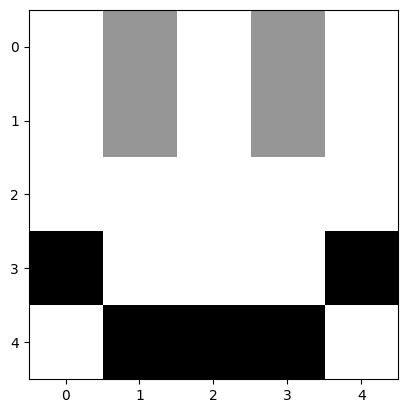

In [36]:
my_image = np.array([[255,150,255,150,255],
                    [255,150,255,150,255],
                    [255,255,255,255,255],
                    [0,255,255,255,0],
                    [255,0,0,0,255]])

plt.imshow(my_image, cmap='gray')
plt.show()